<a href="https://colab.research.google.com/github/Maurchau/Econometria/blob/main/Ex_Problema2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

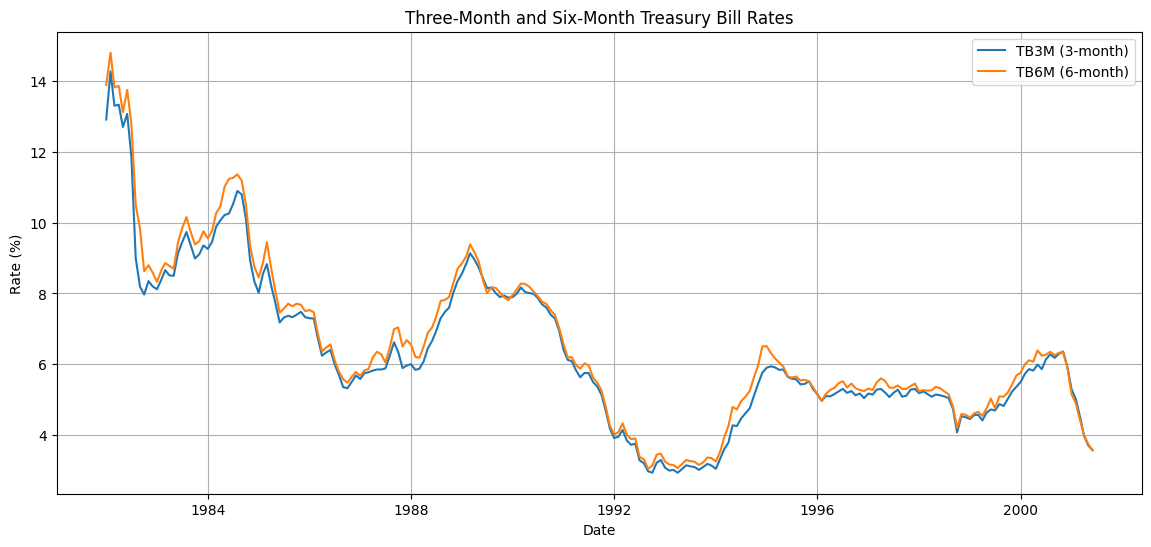

Unit Root Tests (ADF):
ADF Statistic for TB3M: -1.5392
p-value: 0.5140
Critical Values:
   1%: -3.4600
   5%: -2.8746
   10%: -2.5737
Non-stationary
----------------------------------------
ADF Statistic for TB6M: -3.7738
p-value: 0.0032
Critical Values:
   1%: -3.4589
   5%: -2.8741
   10%: -2.5735
Stationary
----------------------------------------

Cointegration Test (Engle-Granger):
t-statistic: -4.7367
p-value: 0.0005
Critical Values: [-3.94406143 -3.36247928 -3.06270268]
The series are cointegrated.

Economic Meaning:

If TB3M and TB6M are cointegrated, it means there is a long-run equilibrium relationship between the two rates.
Shocks to one rate will eventually be reflected in the other, and they will not drift apart indefinitely.
If not cointegrated, the rates may move independently in the long run, implying no stable relationship.


VAR Model Justification:
Since the series are cointegrated, you should use a Vector Error Correction Model (VECM) or first differences in VAR.
If

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [4]:
# --- 1. Import libraries ---
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.vector_ar.var_model import VAR

# --- 2. Paste your data as a multi-line string ---
data = """
obs,GS3M,GS6M
1982:01,12.92,13.90
1982:02,14.28,14.81
1982:03,13.31,13.83
1982:04,13.34,13.87
1982:05,12.71,13.13
1982:06,13.08,13.76
1982:07,11.86,12.80
1982:08,9.00,10.51
1982:09,8.19,9.83
1982:10,7.97,8.63
1982:11,8.35,8.80
1982:12,8.20,8.59
1983:01,8.12,8.33
1983:02,8.39,8.65
1983:03,8.66,8.86
1983:04,8.51,8.78
1983:05,8.50,8.70
1983:06,9.14,9.44
1983:07,9.45,9.85
1983:08,9.74,10.16
1983:09,9.36,9.73
1983:10,8.99,9.39
1983:11,9.11,9.48
1983:12,9.36,9.76
1984:01,9.26,9.56
1984:02,9.46,9.77
1984:03,9.89,10.27
1984:04,10.07,10.47
1984:05,10.22,11.02
1984:06,10.26,11.24
1984:07,10.53,11.27
1984:08,10.90,11.37
1984:09,10.80,11.19
1984:10,10.12,10.52
1984:11,8.92,9.34
1984:12,8.34,8.76
1985:01,8.02,8.45
1985:02,8.56,8.87
1985:03,8.83,9.45
1985:04,8.22,8.71
1985:05,7.73,8.07
1985:06,7.18,7.46
1985:07,7.32,7.57
1985:08,7.37,7.71
1985:09,7.33,7.64
1985:10,7.40,7.71
1985:11,7.48,7.68
1985:12,7.33,7.50
1986:01,7.30,7.53
1986:02,7.29,7.47
1986:03,6.76,6.89
1986:04,6.24,6.36
1986:05,6.33,6.47
1986:06,6.40,6.56
1986:07,6.00,6.12
1986:08,5.69,5.79
1986:09,5.35,5.57
1986:10,5.32,5.48
1986:11,5.50,5.64
1986:12,5.68,5.78
1987:01,5.58,5.67
1987:02,5.75,5.83
1987:03,5.77,5.86
1987:04,5.82,6.19
1987:05,5.85,6.35
1987:06,5.85,6.28
1987:07,5.88,6.05
1987:08,6.23,6.46
1987:09,6.62,6.99
1987:10,6.35,7.04
1987:11,5.89,6.50
1987:12,5.96,6.68
1988:01,6.00,6.56
1988:02,5.84,6.21
1988:03,5.87,6.18
1988:04,6.08,6.50
1988:05,6.45,6.89
1988:06,6.66,7.04
1988:07,6.95,7.35
1988:08,7.30,7.79
1988:09,7.48,7.82
1988:10,7.60,7.90
1988:11,8.03,8.30
1988:12,8.35,8.70
1989:01,8.56,8.85
1989:02,8.84,9.05
1989:03,9.14,9.39
1989:04,8.96,9.17
1989:05,8.74,8.91
1989:06,8.43,8.38
1989:07,8.15,8.01
1989:08,8.17,8.17
1989:09,8.01,8.16
1989:10,7.90,8.03
1989:11,7.94,7.89
1989:12,7.88,7.81
1990:01,7.90,7.96
1990:02,8.00,8.12
1990:03,8.17,8.28
1990:04,8.04,8.27
1990:05,8.01,8.19
1990:06,7.99,8.05
1990:07,7.87,7.92
1990:08,7.69,7.77
1990:09,7.60,7.70
1990:10,7.40,7.53
1990:11,7.29,7.39
1990:12,6.95,7.03
1991:01,6.41,6.58
1991:02,6.12,6.19
1991:03,6.09,6.20
1991:04,5.83,5.98
1991:05,5.63,5.87
1991:06,5.75,6.02
1991:07,5.75,5.97
1991:08,5.50,5.63
1991:09,5.37,5.48
1991:10,5.14,5.26
1991:11,4.69,4.80
1991:12,4.18,4.26
1992:01,3.91,4.01
1992:02,3.95,4.08
1992:03,4.14,4.33
1992:04,3.84,4.00
1992:05,3.72,3.88
1992:06,3.75,3.90
1992:07,3.28,3.38
1992:08,3.20,3.31
1992:09,2.97,3.04
1992:10,2.93,3.13
1992:11,3.21,3.44
1992:12,3.29,3.47
1993:01,3.07,3.24
1993:02,2.99,3.16
1993:03,3.01,3.15
1993:04,2.93,3.06
1993:05,3.03,3.17
1993:06,3.14,3.29
1993:07,3.11,3.26
1993:08,3.09,3.24
1993:09,3.01,3.15
1993:10,3.09,3.22
1993:11,3.18,3.36
1993:12,3.13,3.34
1994:01,3.04,3.25
1994:02,3.33,3.53
1994:03,3.59,3.92
1994:04,3.78,4.25
1994:05,4.27,4.79
1994:06,4.25,4.72
1994:07,4.46,4.95
1994:08,4.61,5.08
1994:09,4.75,5.24
1994:10,5.10,5.62
1994:11,5.45,5.98
1994:12,5.76,6.50
1995:01,5.90,6.51
1995:02,5.94,6.31
1995:03,5.91,6.17
1995:04,5.84,6.05
1995:05,5.85,5.93
1995:06,5.64,5.66
1995:07,5.59,5.62
1995:08,5.57,5.65
1995:09,5.43,5.54
1995:10,5.44,5.56
1995:11,5.52,5.51
1995:12,5.29,5.35
1996:01,5.15,5.13
1996:02,4.96,4.97
1996:03,5.10,5.16
1996:04,5.09,5.27
1996:05,5.15,5.33
1996:06,5.23,5.46
1996:07,5.30,5.52
1996:08,5.19,5.34
1996:09,5.24,5.45
1996:10,5.12,5.32
1996:11,5.17,5.27
1996:12,5.04,5.24
1997:01,5.17,5.31
1997:02,5.14,5.27
1997:03,5.28,5.48
1997:04,5.30,5.60
1997:05,5.20,5.53
1997:06,5.07,5.34
1997:07,5.19,5.33
1997:08,5.28,5.40
1997:09,5.08,5.30
1997:10,5.11,5.30
1997:11,5.28,5.38
1997:12,5.30,5.45
1998:01,5.18,5.23
1998:02,5.23,5.27
1998:03,5.16,5.25
1998:04,5.08,5.26
1998:05,5.14,5.36
1998:06,5.12,5.32
1998:07,5.09,5.23
1998:08,5.04,5.15
1998:09,4.74,4.81
1998:10,4.07,4.20
1998:11,4.53,4.59
1998:12,4.50,4.57
1999:01,4.45,4.49
1999:02,4.56,4.61
1999:03,4.57,4.65
1999:04,4.41,4.54
1999:05,4.63,4.75
1999:06,4.72,5.03
1999:07,4.69,4.75
1999:08,4.87,5.09
1999:09,4.82,5.08
1999:10,5.02,5.20
1999:11,5.23,5.43
1999:12,5.36,5.68
2000:01,5.50,5.76
2000:02,5.73,6.00
2000:03,5.86,6.11
2000:04,5.82,6.07
2000:05,5.99,6.39
2000:06,5.86,6.24
2000:07,6.14,6.27
2000:08,6.28,6.35
2000:09,6.18,6.25
2000:10,6.29,6.32
2000:11,6.36,6.34
2000:12,5.94,5.92
2001:01,5.29,5.15
2001:02,5.01,4.89
2001:03,4.54,4.44
2001:04,3.97,3.99
2001:05,3.70,3.74
2001:06,3.57,3.56
"""

# --- 3. Read the data into a DataFrame ---
df = pd.read_csv(StringIO(data))
# Convert 'obs' to datetime (assume first day of month)
df['obs'] = pd.to_datetime(df['obs'].str.replace(':', '-') + '-01')
df.set_index('obs', inplace=True)

# --- 4. Plot the time series ---
plt.figure(figsize=(14,6))
plt.plot(df['GS3M'], label='TB3M (3-month)')
plt.plot(df['GS6M'], label='TB6M (6-month)')
plt.title('Three-Month and Six-Month Treasury Bill Rates')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# --- 5. Unit root (ADF) tests ---
def adf_test(series, name):
    result = adfuller(series)
    print(f'ADF Statistic for {name}: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value:.4f}')
    print('Stationary' if result[1] < 0.05 else 'Non-stationary')
    print('-'*40)

print("Unit Root Tests (ADF):")
adf_test(df['GS3M'], 'TB3M')
adf_test(df['GS6M'], 'TB6M')

# --- 6. Cointegration test ---
coint_result = coint(df['GS3M'], df['GS6M'])
print("\nCointegration Test (Engle-Granger):")
print(f"t-statistic: {coint_result[0]:.4f}")
print(f"p-value: {coint_result[1]:.4f}")
print("Critical Values:", coint_result[2])
if coint_result[1] < 0.05:
    print("The series are cointegrated.")
else:
    print("The series are NOT cointegrated.")

# --- 7. Economic meaning of cointegration ---
print("\nEconomic Meaning:")
print("""
If TB3M and TB6M are cointegrated, it means there is a long-run equilibrium relationship between the two rates.
Shocks to one rate will eventually be reflected in the other, and they will not drift apart indefinitely.
If not cointegrated, the rates may move independently in the long run, implying no stable relationship.
""")

# --- 8. VAR model justification ---
print("\nVAR Model Justification:")
if coint_result[1] < 0.05:
    print("Since the series are cointegrated, you should use a Vector Error Correction Model (VECM) or first differences in VAR.")
else:
    print("If the series are not cointegrated and are non-stationary, use first differences for VAR modeling.")
print("If both series are stationary, you can use levels in VAR.")

# --- 9. (Optional) Estimate VAR model with 4 lags ---
df_diff = df.diff().dropna()
model = VAR(df_diff)
results = model.fit(4)
print("\nVAR(4) Summary (on first differences):")
print(results.summary())


**Respuesta a Preguntas**

a. Al gráficar TB3M Y TB6M se puede ver que se comportan muy similar a lo largo del tiempo con tb6m un poco mas arriba que la otra. Tienen comportamiento similar lo que sugiere que sus movimiento estan correlacionados entre si a un alto nivel.

b. TB3M : Estadisitoc ADF de -1.5392 y valor p de .5. Dado que el p valor es mayor que .05 entonces es no estacinariio.

TB6M ADF de -3.777 y valor p de .0032 con valores criticos de
   1%: -3.4589
   5%: -2.8741
   10%: -2.5735
El estadistico adf es menor a los valores criticos y el valor p es menor a .05 entonces es estacionario.

c. Estadistico t de -4.7 Y VALOR P DE 0.0005 con valores criticos de Critical[-3.94406143 -3.36247928 -3.06270268]
el estadistico t es menor aue valores criticos y el valor p es mucho menor a 0.05 entonces se puede decir que las series estan cointegradas.

d. El hecho de que las series esten cointegradas significa que tiene una relacion de equilibrio en el largo plazo. Su combinacion lineal es estacionaria. Las tasas se mueven juntas a lo largo del tiepo y si se desvian temporalmente se corregiran y volveran  aunir. Tiene sentido en economia que las tasas se muevan juntas y estan correlacionadas entre si y tiene sentido que la de mayor plazo tb6m tienda a estar un poco por arriba quje la de menor plazo.

 e. Como las series estan cointegradas, no es correcto usar VAR estandar en primeras diferencias. Se usa el VECM que toma en cuenta las dinamicas de corto y equlibrio largo plazo.




**Prompt a Copilot** No me deja compartir la liga

User:
I want to make a code in google colab python that answers this question.Table 22.7 gives data on three-month (TB3M) and six-month (TB6M) Treasury bill rates from January 1, 1982, to March 2008, for a total of 315 monthly observations. The data can be found on the textbook’s website.
a. Plot the two time series in the same diagram. What do you see?
b. Do a formal unit root analysis to find out if these time series are stationary.
c. Are the two time series cointegrated? How do you know? Show the necessary calculations.
d. What is the economic meaning of cointegration in the present context? If the two series are not cointegrated, what are the economic implications?
e. If you want to estimate a VAR model, say, with four lags of each variable, do you have to use the first differences of the two series or can you do the analysis in levels of the two series? Justify your answer.

Copilot:
(Processes file upload and prepares to read the Excel file.)

User:
(implied: uploads file Datos 22-7.xlsx)

Copilot:
(Reads the file and generates a plot of the time series, describing what is seen.)

User:
give me the full python script

Copilot:
Provides a full Python script for Google Colab that:

Loads the Excel file
Plots the time series
Performs ADF tests
Tests for cointegration
Explains economic meaning
Justifies VAR modeling
Optionally estimates a VAR(4) model


User:
im going to upoload the excel file in google colab

Copilot:
Explains how to use the script with the uploaded file and offers customization.

User:
insert the data directly into the text of the code obs	GS3M		GS6M	... (pastes data)

Copilot:
Provides a full Python script with the data embedded as a multi-line string, ready to run in Colab.

User:
why are there only 229 nobs in the result?

Copilot:
Explains that the number of observations matches the pasted data (January 1982 to June 2001), not the full 315 months. Also notes that differencing for VAR drops one more row.

User:
give me a full transcript of this chat

If you need this transcript in a different format (plain text, markdown, PDF, etc.), let me know!

In [5]:
!jupyter nbconvert --to html /content/Ex_Problema2.ipynb

[NbConvertApp] Converting notebook /content/Ex_Problema2.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 395135 bytes to /content/Ex_Problema2.html
